In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print boston.DESCR

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0,0.5,'Number of houses')

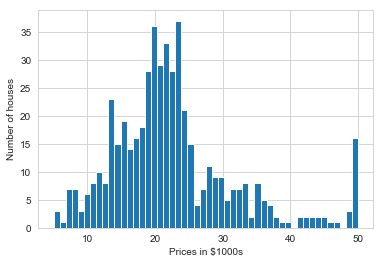

In [6]:
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

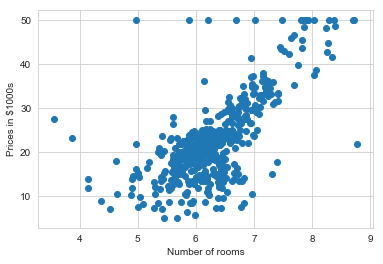

In [7]:
plt.scatter(boston.data[ : ,5], boston.target)

plt.ylabel('Prices in $1000s')
plt.xlabel('Number of rooms')

In [9]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


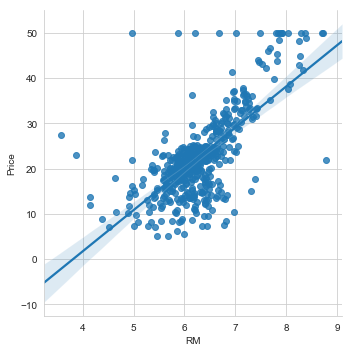

In [12]:
sns.lmplot('RM','Price',data=boston_df)

In [16]:
X = boston_df.RM
X.shape

(506L,)

In [20]:
X = np.vstack(boston_df.RM)

In [18]:
X.shape

(506L,)

In [17]:
Y = boston_df.Price

In [22]:
#[X] but want [X 1]
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [24]:
# [X 1]
X = np.array( [ [value,1] for value in X] )

In [25]:
X

array([[array([array([6.575]), 1], dtype=object), 1],
       [array([array([6.421]), 1], dtype=object), 1],
       [array([array([7.185]), 1], dtype=object), 1],
       ...,
       [array([array([6.976]), 1], dtype=object), 1],
       [array([array([6.794]), 1], dtype=object), 1],
       [array([array([6.03]), 1], dtype=object), 1]], dtype=object)

In [30]:
""""X = boston_df.RM

X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

Y = boston_df.Price

m,b = np.linalg.lstsq(X,Y)[0]

print(m, b)

plt.plot(boston_df.RM,boston_df.Price,'o')

x= boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')"""



'"X = boston_df.RM\n\nX=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T\n\nY = boston_df.Price\n\nm,b = np.linalg.lstsq(X,Y)[0]\n\nprint(m, b)\n\nplt.plot(boston_df.RM,boston_df.Price,\'o\')\n\nx= boston_df.RM\n\nplt.plot(x, m*x + b,\'r\',label=\'Best Fit Line\')'

In [31]:
X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T


In [34]:
m,b = np.linalg.lstsq(X,Y,rcond=-1)[0]

In [35]:
print(m, b)

(9.102108981180312, -34.67062077643856)


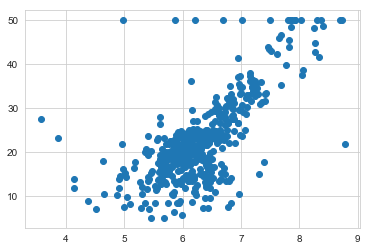

In [36]:
plt.plot(boston_df.RM,boston_df.Price,'o')

In [37]:
x= boston_df.RM

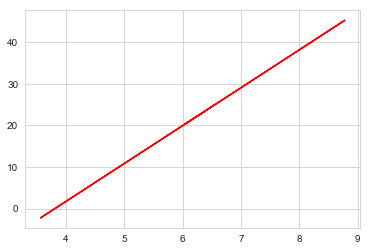

In [38]:
plt.plot(x, m*x + b,'r',label='Best Fit Line')
#'r'stands for red color

In [39]:
import sklearn
from sklearn.linear_model import LinearRegression

In [40]:
lreg = LinearRegression()

In [41]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [42]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print 'The estimated intercept coeff is %.2f'%lreg.intercept_

print 'The number of coeff used was %d'%len(lreg.coef_)

The estimated intercept coeff is 36.46
The number of coeff used was 13


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, boston_df.Price)

In [47]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [48]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)


In [50]:
print "Fit a model of X_train, calculate MSE using Y_train: %.2f" %np.mean((Y_train-pred_train)**2)

print "Fit a model of X_train, calculate MSE using X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2)

Fit a model of X_train, calculate MSE using Y_train: 45.08
Fit a model of X_train, calculate MSE using X_test and Y_test: 39.69
